### Data wrangling without loss

Inspect the “patients_lab_results_messy.csv” dataset

What is wrong with the dataset? Look for e.g. 
- Inconsistent labelling
- Inconsistent casing
- Missing values

Fix the issues without loosing any data! 

Discuss the reversibility of your steps and think about how you can make sure that you did not loose any data!


In [1]:
import pandas as pd

df = pd.read_csv("patients_results_messy.csv")
df

,Patient_ID,Visit Date,age,Gender,Blood Pressure (mmHg),Chol (mg_dl),glucose,Notes
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up


Clean up column names using string methods:

In [2]:
df.columns = df.columns.str.lower().str.replace('[^a-z0-9]+', '_', regex=True).str.strip('_')
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up


In [5]:
df["glucose"]

0         95
1        NaN
2         88
3    missing
4         89
5         89
6     ninety
7        100
8         92
9         97
Name: glucose, dtype: object

In [6]:
df.glucose

0         95
1        NaN
2         88
3    missing
4         89
5         89
6     ninety
7        100
8         92
9         97
Name: glucose, dtype: object

Split blood pressure values into two columns, using the string method split():

In [3]:
df[['systolic', 'diastolic']] = df['blood_pressure_mmhg'].str.split('/', expand=True)
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline,120,80
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-,135,90
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck,115,75
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient,140,95
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat,118,78
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat,118,78
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose,125,82
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline,130,85
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-,128,84
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up,132,88


In [4]:
df.systolic = df.systolic.apply(pd.to_numeric)
df.diastolic = df.diastolic.apply(pd.to_numeric)

Convert glucose values:

In [5]:
df['glucose'] = pd.to_numeric(df['glucose'], errors="coerce") # avoids crashing if wrong types are parsed
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic
0,P001,2021-01-03,34.0,Male,120/80,180.0,95.0,baseline,120,80
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-,135,90
2,P003,03-01-2021,29.0,male,115/75,190.0,88.0,recheck,115,75
3,p004,2021.01.04,52.0,F,140/95,220.0,NaN,new patient,140,95
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
6,P007,2021/01/07,NaN,Male,125/82,200.0,NaN,typo in glucose,125,82
7,P008,2021-01-08,46.0,Female,130/85,195.0,100.0,baseline,130,85
8,P009,2021-01-09,50.0,female,128/84,NaN,92.0,-,128,84
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97.0,follow-up,132,88


Standardize gender:

In [6]:
df['gender'] = df['gender'].str.upper().map({'MALE': 'M', 'FEMALE': 'F', 'M': 'M', 'F': 'F'})
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80
1,P002,2021/1/05,45.0,F,135/90,210.0,NaN,-,135,90
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75
3,p004,2021.01.04,52.0,F,140/95,220.0,NaN,new patient,140,95
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
6,P007,2021/01/07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88


Parse dates to standard format:

In [7]:
# standardize visit_date
df['visit_date'] = (
    df['visit_date']
    .str.replace(r'[./]', '-', regex=True)  # unify separators
    .str.strip()
)

df['visit_date_clean'] = pd.to_datetime(df['visit_date'], errors='coerce')
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT
3,p004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10


Fill or flag missing data (no deletions) in some of the columns:

Further cleanup: patient_id!

In [8]:
df.patient_id = df.patient_id.str.upper()
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10


Convert type in systolic and diastolic pressure columns (pd.to_numeric)

In [ ]:
# already did this

Add the extended patient list and the patients info.

In [9]:
df_extension = pd.read_csv("patient_list_extended.csv")
df_2merge = pd.read_csv("patients_info.csv")

In [10]:
df_extension

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic
0,P011,2021-01-03,33.0,M,110/81,177.0,85.0,baseline,110,81
1,P012,2021/1/05,55.0,F,135/92,NaN,NaN,-,135,92
2,P013,2021/1/05,69.0,M,125/75,190.0,82.0,NaN,125,75
3,P014,2021.01.04,42.0,F,130/91,228.0,125.0,new patient,130,91
4,P015,2021-01-06,43.0,M,118/79,134.0,111.0,NaN,118,79
5,P016,2021-01-06,63.0,M,133/78,188.0,99.0,repeat,133,78
6,P017,2021/01/07,NaN,M,122/82,210.0,76.0,new patient,122,82
7,P018,2021-01-08,NaN,F,134/86,192.0,130.0,NaN,134,86
8,P018,2021-01-08,NaN,F,134/86,192.0,130.0,NaN,134,86
9,P019,2021-01-09,44.0,F,128/83,NaN,99.0,-,128,83


In [11]:
df_2merge

,patient_id,bmi,smoker
0,P001,24.5,No
1,P002,27.2,Yes
2,P003,25.0,No
3,P004,31.0,Yes
4,P005,26.4,No
5,P006,22.5,No
6,P007,24.2,Yes
7,P008,23.0,No
8,P009,27.0,No
9,P010,22.4,No


In [14]:
df_extended = pd.concat([df, df_extension], ignore_index=True)
df_extended

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10


In [15]:
df_complete = pd.merge(df_extended, df_2merge, on="patient_id", how="outer")
df_complete

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05,27.2,Yes
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04,31.0,Yes
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,22.5,No
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07,24.2,Yes
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08,23.0,No
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09,27.0,No
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10,22.4,No


In [16]:
df_complete2 = df_extended.join(df_2merge, on="patient_id", how="outer")
df_complete2

ValueError: You are trying to merge on object and int64 columns for key 'patient_id'. If you wish to proceed you should use pd.concat

In [18]:
print(df.shape)
print(df_extension.shape)
print(df_extended.shape)
print(df_2merge.shape)
print(df_complete.shape)

(10, 11)
(42, 10)
(52, 11)
(38, 3)
(56, 13)


In [19]:
df_complete.to_csv("patients_list_complete.csv", index=False)

In [22]:
df_complete.isna().sum()

patient_id              0
visit_date              0
age                     9
gender                  0
blood_pressure_mmhg     0
chol_mg_dl              7
glucose                15
notes                  21
systolic                0
diastolic               0
visit_date_clean       47
bmi                    18
smoker                 24
dtype: int64

In [24]:
df_complete["is_age_missing"] = df_complete.age.isna()

In [25]:
df_complete

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker,is_age_missing
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No,False
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05,27.2,Yes,False
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No,False
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04,31.0,Yes,False
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No,False
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,22.5,No,False
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07,24.2,Yes,True
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08,23.0,No,False
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09,27.0,No,False
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10,22.4,No,False


In [26]:
df_complete["is_chol_missing"] = df_complete.chol_mg_dl.isna()
df_complete

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker,is_age_missing,is_chol_missing
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No,False,False
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05,27.2,Yes,False,False
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No,False,False
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04,31.0,Yes,False,False
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No,False,False
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,22.5,No,False,False
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07,24.2,Yes,True,False
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08,23.0,No,False,False
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09,27.0,No,False,True
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10,22.4,No,False,False


In [30]:
df_dropna_chol_smoker = df_complete.dropna(subset=["chol_mg_dl", "smoker"])
df_dropna_chol_smoker

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker,is_age_missing,is_chol_missing
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No,False,False
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05,27.2,Yes,False,False
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No,False,False
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04,31.0,Yes,False,False
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No,False,False
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,22.5,No,False,False
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07,24.2,Yes,True,False
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08,23.0,No,False,False
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10,22.4,No,False,False
10,P011,2021-01-03,33.0,M,110/81,177.0,85.0,baseline,110,81,NaT,22.5,No,False,False


In [28]:
import seaborn as sns

<Axes: xlabel='smoker', ylabel='chol_mg_dl'>

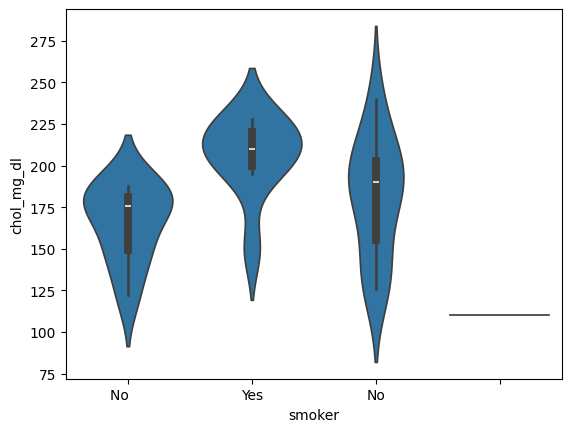

In [31]:
sns.violinplot(df_dropna_chol, x=df_dropna_chol_smoker["smoker"], y=df_dropna_chol_smoker["chol_mg_dl"])

In [35]:
df_complete.duplicated().sum()
df_complete.drop_duplicates(subset=["age","chol_mg_dl"])

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker,is_age_missing,is_chol_missing
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No,False,False
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05,27.2,Yes,False,False
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No,False,False
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04,31.0,Yes,False,False
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No,False,False
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07,24.2,Yes,True,False
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08,23.0,No,False,False
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09,27.0,No,False,True
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10,22.4,No,False,False
10,P011,2021-01-03,33.0,M,110/81,177.0,85.0,baseline,110,81,NaT,22.5,No,False,False
